> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate TMDB Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [5]:
# In this project I chose the 'tmdb_movies' data for analysis , this dataset contains information of the movies released
#since 1950s, features containing revenue, budget, popularity, title, theme, keywords etc.
df = pd.read_csv('tmdb_movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

__Dependent variable: average vote, Revenue_adj__

__Independent variable: Popularity, budget_adj, genres, release year, cast__

__Questions__:

1. Do Runtime have a relationship with revenue

2. Does movies with higher average vote have higher revenue

3. Does popularity has a relationship with revenue

4. Does popularity has a relationship with average vote

5. The adjusted revenue changing trend over years

6. The adjusted budget changing trend over years

__Reasons for not using other featrues:__

_id, imdb-id:_

For features like id and imdb_id which are used to indicate different movies and are useless while we want to find the factors that influence revenue and average vote, so we can just drop them.

_cast, director, original title, homepage, tagline, production-companies:_

For factors like cast, director, original title, homepage, tagline, production_companies, it is hard to find the relationship with the revenue and vote averages, so I decide to drop them. Actually we can analyze the cast and budget relationship and the final revenue, but because there are so many cast in a movie which is hard to tell who are the most important actors.

_Keywords, Overview_:

For the factor " Keywords", "Overview" which should be a useful factor for us to see what the content and the theme of the movie is, but it can be hard to relate this featrue with revenue and average vote which is useless for my goal this time, so I will drop this column.

_revenue, budget_:

Because money has time value, so it is hard to compare each movie's accomplishment just using the revenue in their release year, and thankfully we have the adjusted revenue which uses 2010 as the standard year to adjust the revenue, so in our analysis, we will use adjusted revenue and adjusted budget instead of the original revenue and budget.



### Data Cleaning

In [8]:
df.drop(['id','imdb_id','original_title','cast','homepage','director','tagline','keywords','overview','production_companies','release_date','budget','revenue'],axis = 1,inplace = True)
df.head()

,popularity,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
popularity      10866 non-null float64
runtime         10866 non-null int64
genres          10843 non-null object
vote_count      10866 non-null int64
vote_average    10866 non-null float64
release_year    10866 non-null int64
budget_adj      10866 non-null float64
revenue_adj     10866 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 679.2+ KB


In [10]:
# As we can see that "genres" has a few missing values but are a really small number compared to the total rows
# so I think we can simply drop them and it won't have significant influence on the overall analysis.
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 8 columns):
popularity      10843 non-null float64
runtime         10843 non-null int64
genres          10843 non-null object
vote_count      10843 non-null int64
vote_average    10843 non-null float64
release_year    10843 non-null int64
budget_adj      10843 non-null float64
revenue_adj     10843 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 762.4+ KB


As we can see from the data described at the beginning and the pictures below, the adjusted revenue and the adjusted budget have zero values occupied around 50%, and the number of movies having zero budget and zero revenue increases over year.

But from the further investigation of the movies released every year, the number of movies which have non-zero revenue and non-zero budget also increases over year, which means the movies released each year increased. 

When I do the EDA, movies with zero adjusted revenue or adjusted budget couldn't provide a useful inofrmation about the movies real performance, so I will only use the data with non-zero data to plot.

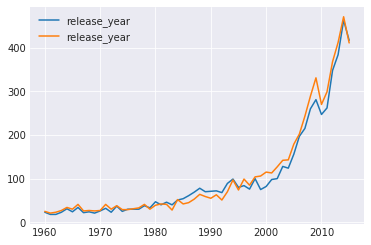

In [14]:
df[df.budget_adj == 0].release_year.value_counts().sort_index().plot(kind = 'line')
df[df.revenue_adj == 0].release_year.value_counts().sort_index().plot(kind = 'line')
plt.legend()

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Hist plot of the rest featrues

This hist plot investigates the featrues values distribution.

Just as I said there are a lot of values in budget_adj and revenue_adj are zero.

Popularity is strongly rignth skewed.

Vote average has a distribution similar to normal distribution with an average at around 6

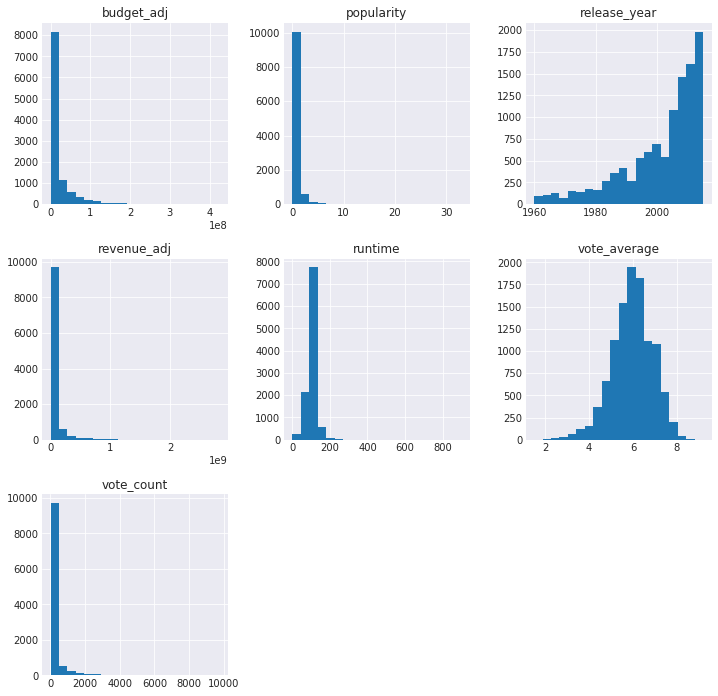

In [15]:
df.hist(figsize = (12,12),bins = 20);

### Do movies with higher average vote have higher adjusted revenue?

This plot investigates the relationship between the movies vote average and the adjusted revenue. There's an obvious positive relationship between these two, but we can see that there are lots of movies with higher vote average but low adjusted revenue, which I think may be caused by the advertisement and the arrangements of the movies. In general, this plot makes sense in reality.

Text(0,0.5,'Movies adjusted revenue')

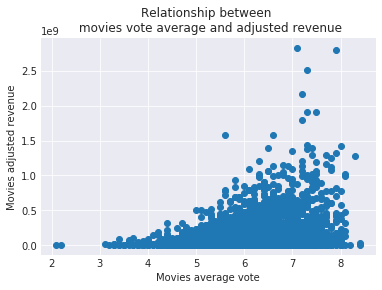

In [16]:
plt.scatter(df.query("revenue_adj != 0").vote_average,df.query("revenue_adj != 0").revenue_adj)
plt.title("Relationship between \n movies vote average and adjusted revenue")
plt.xlabel("Movies average vote")
plt.ylabel("Movies adjusted revenue")

### Do adjusted budget have a relationship with adjusted revenue?

This picture investigate the relationship between the movies adjusted budget and the movies adjusted revenue. From the plot below we can see that the relationship between budget and revenue doesn't display a very strong positive relationship. In reality, because there are many kinds of movies of which cost differ a lot, and some low cost movies can be really popular

Text(0,0.5,'Movies adjusted revenue')

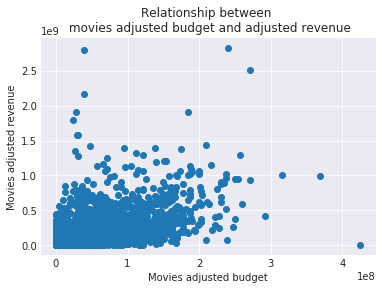

In [17]:
plt.scatter(df.query("revenue_adj != 0").budget_adj,df.query("revenue_adj != 0").revenue_adj);
plt.title("Relationship between \n movies adjusted budget and adjusted revenue")
plt.xlabel("Movies adjusted budget")
plt.ylabel("Movies adjusted revenue")


### Do popularity has a relationship with adjusted revenue? 

This picture investigate the relationship between the movies popularity and the movies adjusted revenue. Because there are around 50% movies' adj_revenue are zeros, so when I plot this picture I ignored the zero values which in reality won't occur. From the plot we can see that popularity has a positive relationship with movies revenue which makes sense

Text(0,0.5,'Movies adjusted revenue')

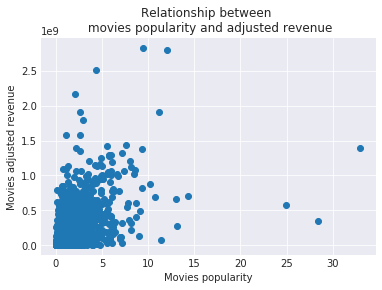

In [18]:
plt.scatter(df.query("revenue_adj != 0").popularity,df.query("revenue_adj != 0").revenue_adj);
plt.title("Relationship between \n movies popularity and adjusted revenue")
plt.xlabel("Movies popularity")
plt.ylabel("Movies adjusted revenue")

### Do popularity has a relationship with average vote? 

This plot investigates the relationship between the movies average vote and movies popularity. In common sense, movies with higher vote average will have higher popularity which is the same as the plot indicates


Text(0,0.5,'Movies popularity')

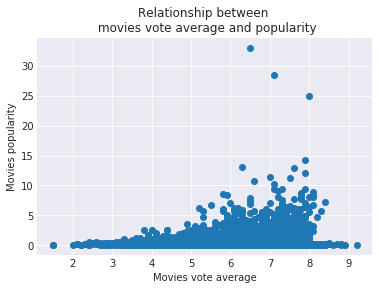

In [19]:
plt.scatter(df.vote_average,df.popularity)
plt.title("Relationship between \n movies vote average and popularity")
plt.xlabel("Movies vote average")
plt.ylabel("Movies popularity")

### Movies released number changing trend

From the plot below we can see that the number of movies released increases over years

Text(0,0.5,'Number of movies')

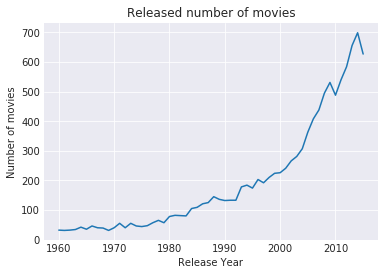

In [54]:
df.groupby(df.release_year).count()['popularity'].plot(kind = 'line')
plt.title("Released number of movies")
plt.xlabel("Release Year")
plt.ylabel("Number of movies")

### The adjusted revenue changing trend over years

From the plot below we can see that the sum of adjusted revenue which indicates that the movies industry's development. Combined with the next picture and the above one, we can see that it's because of the released number increases over years.

The mean of revenue has a high volatility in the early years which may be caused by the unstable market and the economy condition. 

Text(0,0.5,'Revenue_adj')

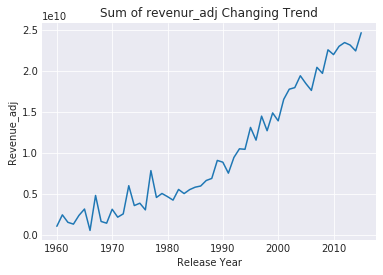

In [41]:

df.groupby(df.release_year).sum()['revenue_adj'].plot(kind = 'line')
plt.title("Sum of revenue_adj Changing Trend")
plt.xlabel("Release Year")
plt.ylabel("Revenue_adj")

Text(0,0.5,'Revenue_adj Mean')

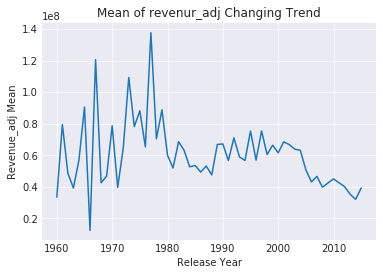

In [42]:
df.groupby(df.release_year).mean()['revenue_adj'].plot(kind = 'line')
plt.title("Mean of revenue_adj Changing Trend")
plt.xlabel("Release Year")
plt.ylabel("Revenue_adj Mean")

### The adjusted budget changing trend over years

From the plot below we can see that the sum of adjusted revenue increases over years which makes sense because as the industry develops, the total number of movies increases and the cost from any aspects increases.

But the mean of budget reaches peaked in 2000 and then declines which may be caused by the development of the low-cost techniques in the iundustry. 

Text(0,0.5,'Budget_adj')

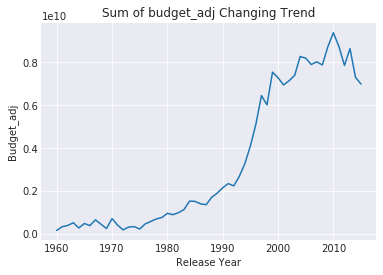

In [43]:
df.groupby(df.release_year).sum()['budget_adj'].plot(kind = 'line')
plt.title("Sum of budget_adj Changing Trend")
plt.xlabel("Release Year")
plt.ylabel("Budget_adj")

Text(0,0.5,'Budget_adj Mean')

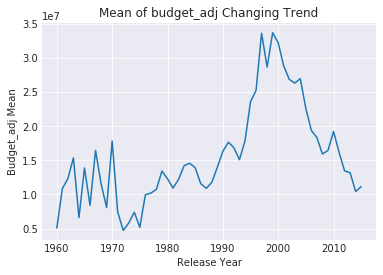

In [44]:
df.groupby(df.release_year).mean()['budget_adj'].plot(kind = 'line')
plt.title("Mean of budget_adj Changing Trend")
plt.xlabel("Release Year")
plt.ylabel("Budget_adj Mean")

### The profit changing trend over years

This plot describes the mean and the sum of the profit changing trend these years. From the plot below we can see that the mean of the profit has a higher volatility in early years while becomes stable later which may comes from the increasingly matured market. There's a weak trend of declination in mean profit indicating the comptetitive market.

In [45]:
# Generate 'profit' column
df['profit'] = df['revenue_adj']-df['budget_adj']

Text(0,0.5,'Profit Mean')

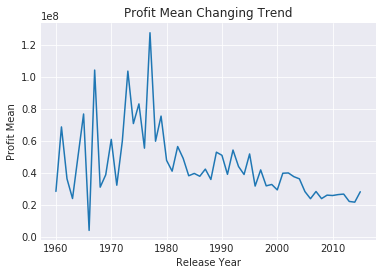

In [47]:
df.groupby(df.release_year).mean()['profit'].plot(kind = 'line')
plt.title("Profit Mean Changing Trend")
plt.xlabel("Release Year")
plt.ylabel("Profit Mean")

Text(0,0.5,'Profit Sum')

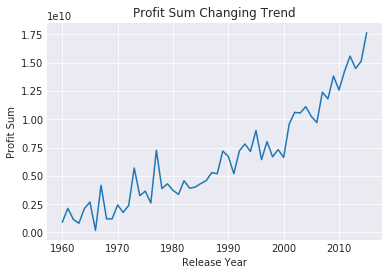

In [48]:
df.groupby(df.release_year).sum()['profit'].plot(kind = 'line')
plt.title("Profit Sum Changing Trend")
plt.xlabel("Release Year")
plt.ylabel("Profit Sum")

<a id='conclusions'></a>
## Conclusions


The data we used was relatively clean compared to most of the data in market. Structure, missing valus and duplicates are solved well.

The data is a kind of time series data, we can see the general trend of the movie industry's development. If we can use more techniques like machine learning, we can do prediction on the next year's profit or which kind of combination of cast and drector can have a better movie.

Just based on the plot we can only know a few interesting trends or relationship from surface, if we want to explore further, more statistical analysis and modeling are needed. 

Finally, The movies industry develops as there are more movies released year by year, from the budget changing trend and the profit changing trend we can see that the industry is becoming more and more well-developed and competitive.



## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0